In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There are no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.duplicated().sum()

2

There are two duplicated entries

In [10]:
df['duplicate'] = df.duplicated()

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,duplicate
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False


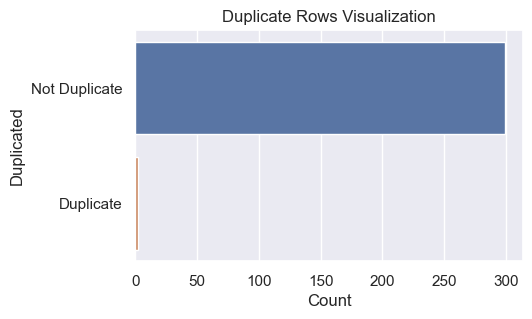

In [12]:
sns.set(rc={"figure.figsize":(5, 3)})
sns.countplot(y='duplicate', data=df)
plt.xlabel('Count')
plt.ylabel('Duplicated')
plt.title('Duplicate Rows Visualization')
plt.yticks([0, 1], ['Not Duplicate', 'Duplicate']) 
plt.show()

In [13]:
df=df.drop(["duplicate"],axis=1)

In [14]:
features=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

In [15]:
df = df.drop_duplicates(subset=features)

In [16]:
df.duplicated().sum()

0

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Transmission', ylabel='count'>

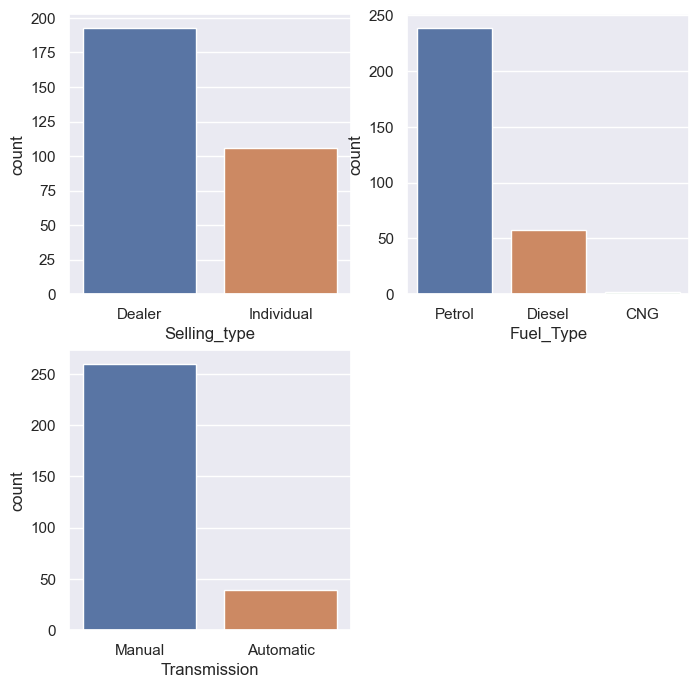

In [18]:
sns.set(rc={"figure.figsize":(8, 8)})
plt.subplot(2, 2,1)
sns.countplot(data=df,x="Selling_type")
plt.subplot(2, 2,2)
sns.countplot(data=df,x="Fuel_Type")
plt.subplot(2, 2,3)
sns.countplot(data=df,x="Transmission")

<AxesSubplot:xlabel='count', ylabel='Car_Name'>

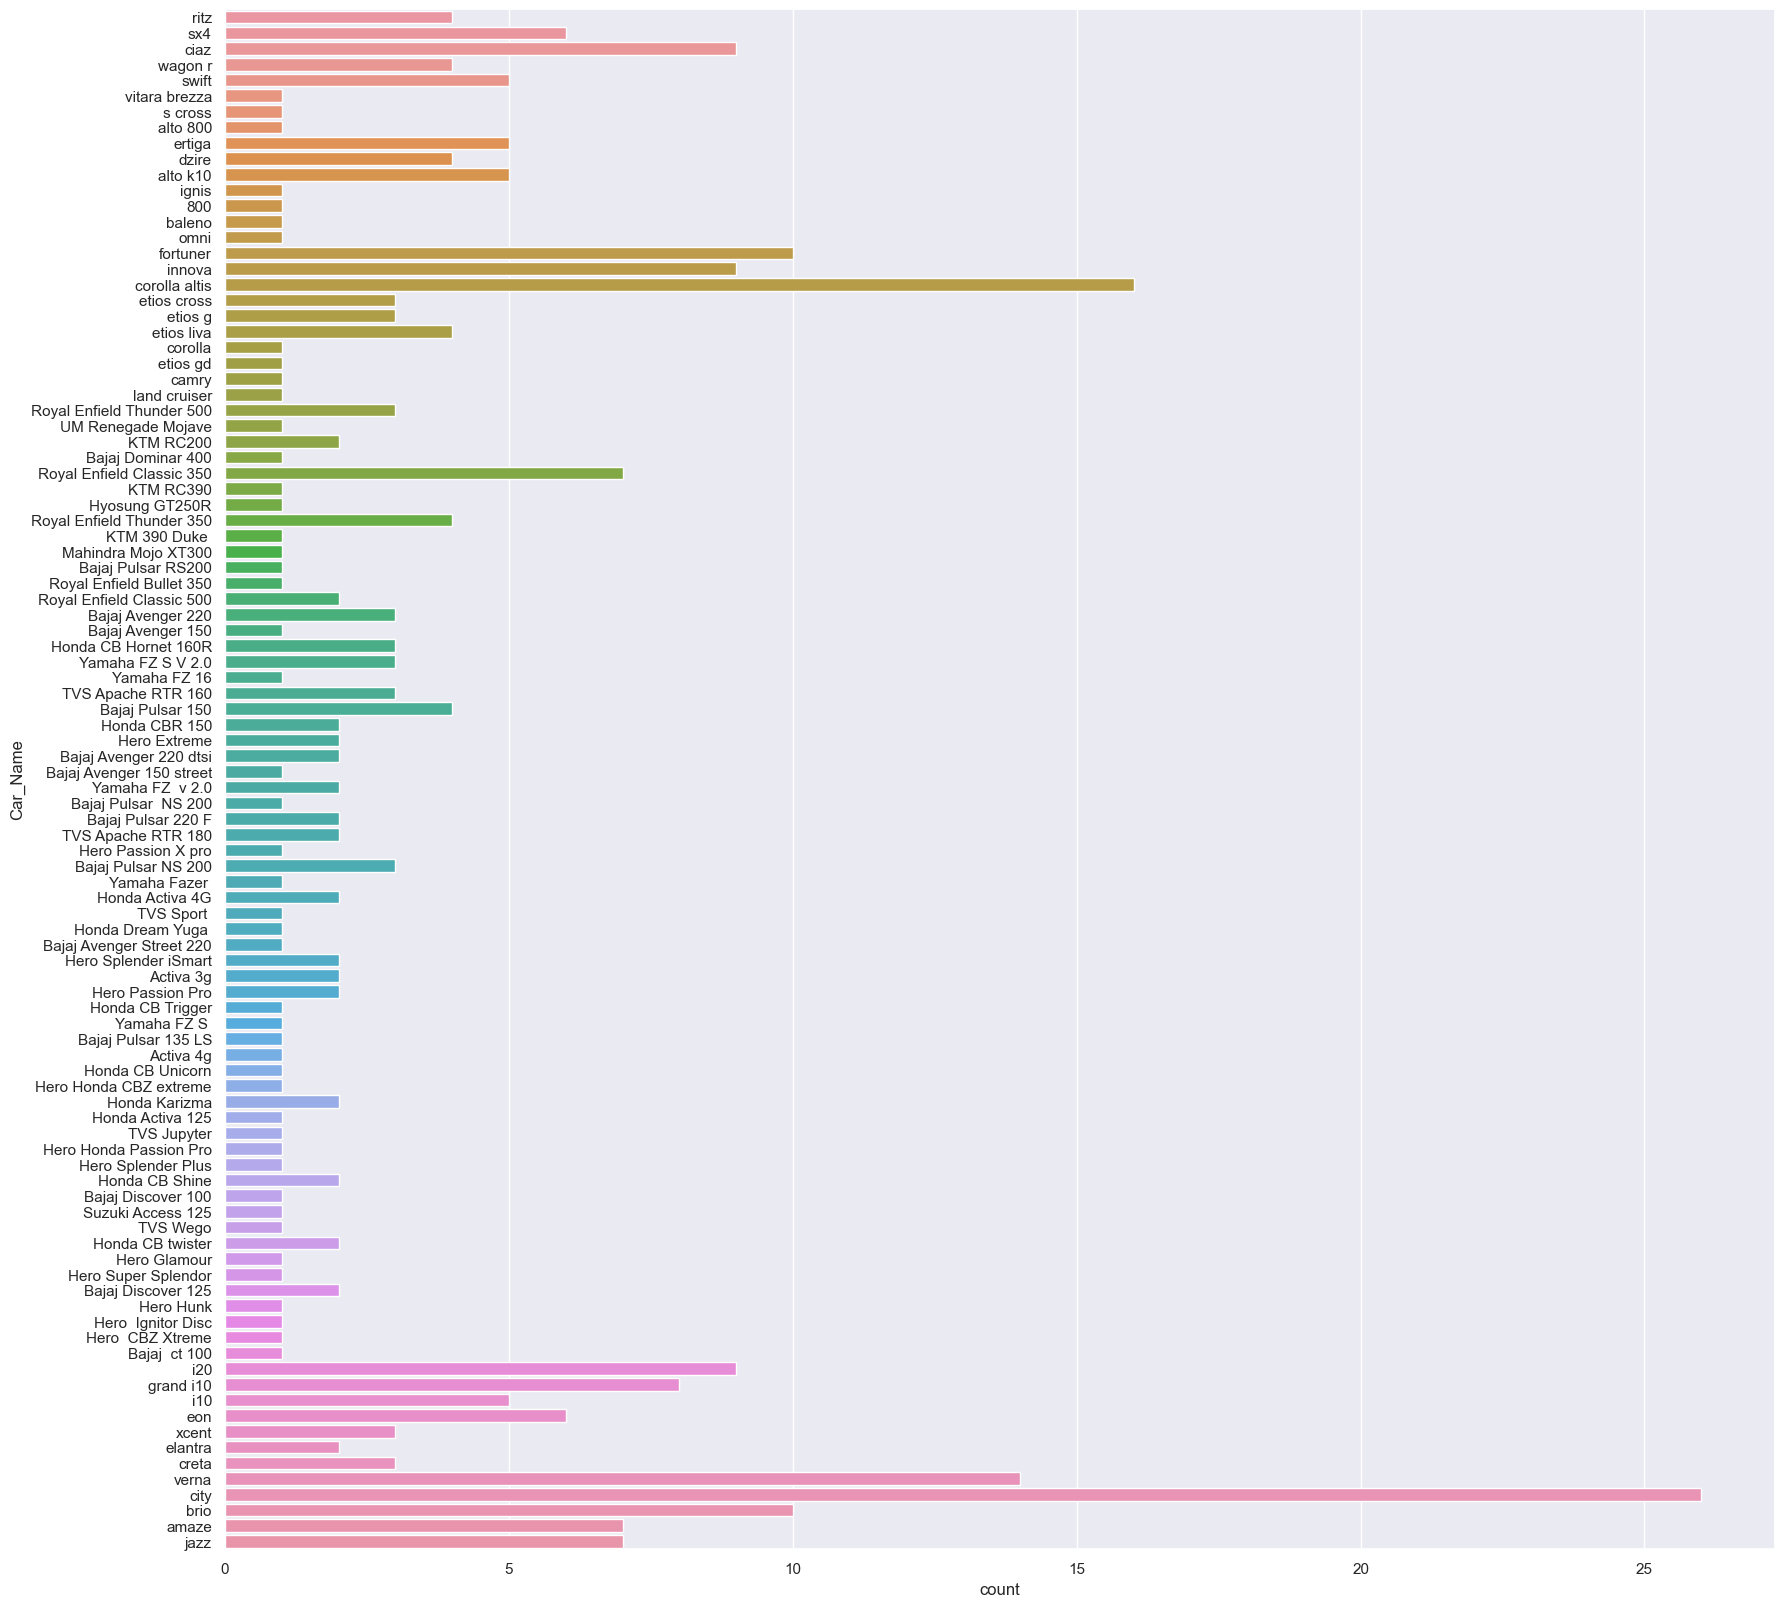

In [19]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.countplot(data=df,y="Car_Name")

Encoding categorical data(Car_Name) into numeric data

In [20]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df["Car_Name"]=en.fit_transform(df["Car_Name"])

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,68,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,96,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,92,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
numeric_features=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']

In [23]:
correlation_matrix = df[numeric_features].corr()

<AxesSubplot:>

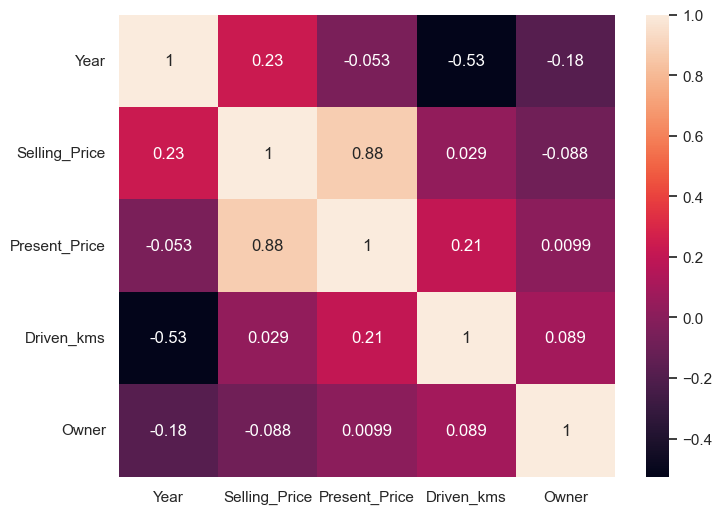

In [24]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.heatmap(correlation_matrix,annot=True)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

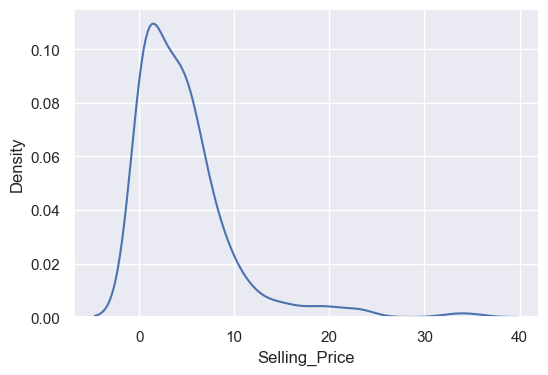

In [25]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.kdeplot(data=df,x="Selling_Price")

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

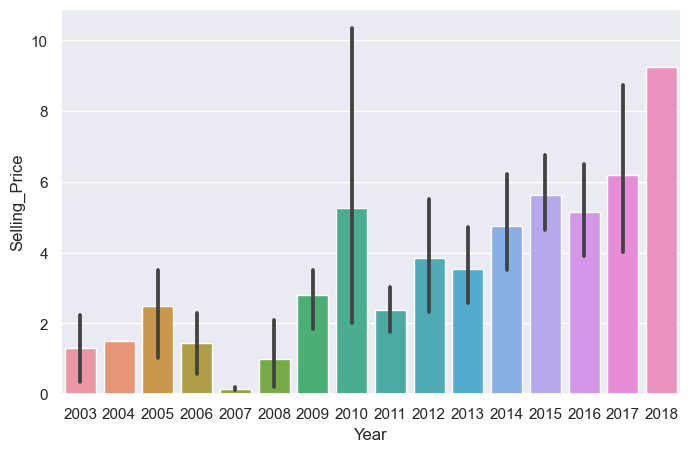

In [26]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.barplot(data=df,x="Year",y="Selling_Price")

Selling price had increased in every year

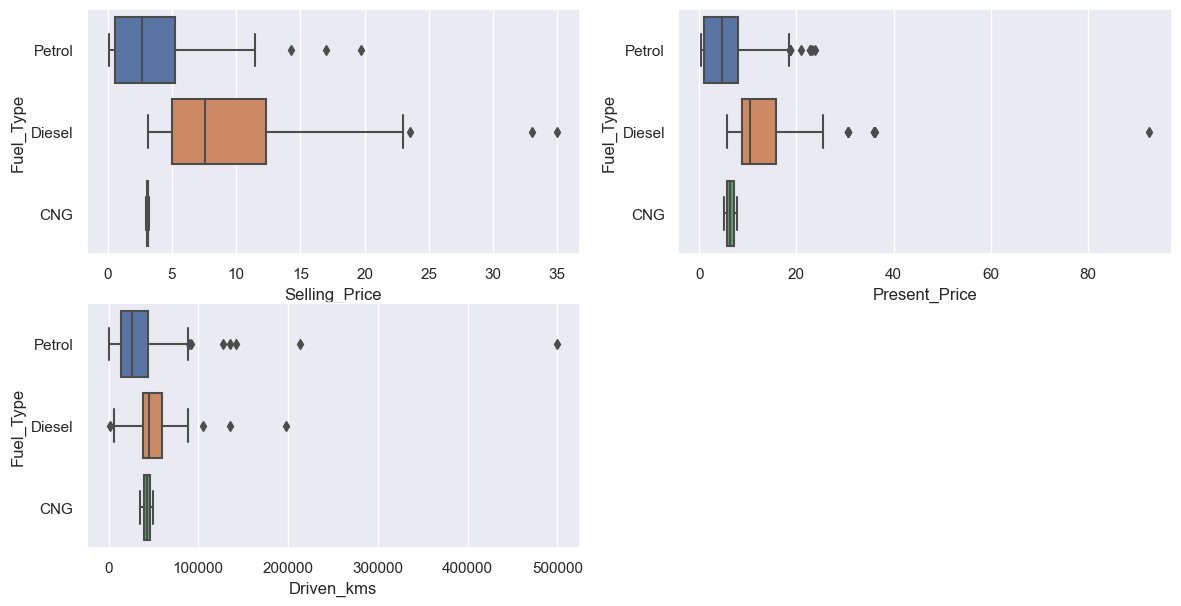

In [27]:
plt.figure(figsize=(14,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, y='Fuel_Type', x=col, orient='h')

There are some outliers which needs to be fixed in order to correctly predict the price

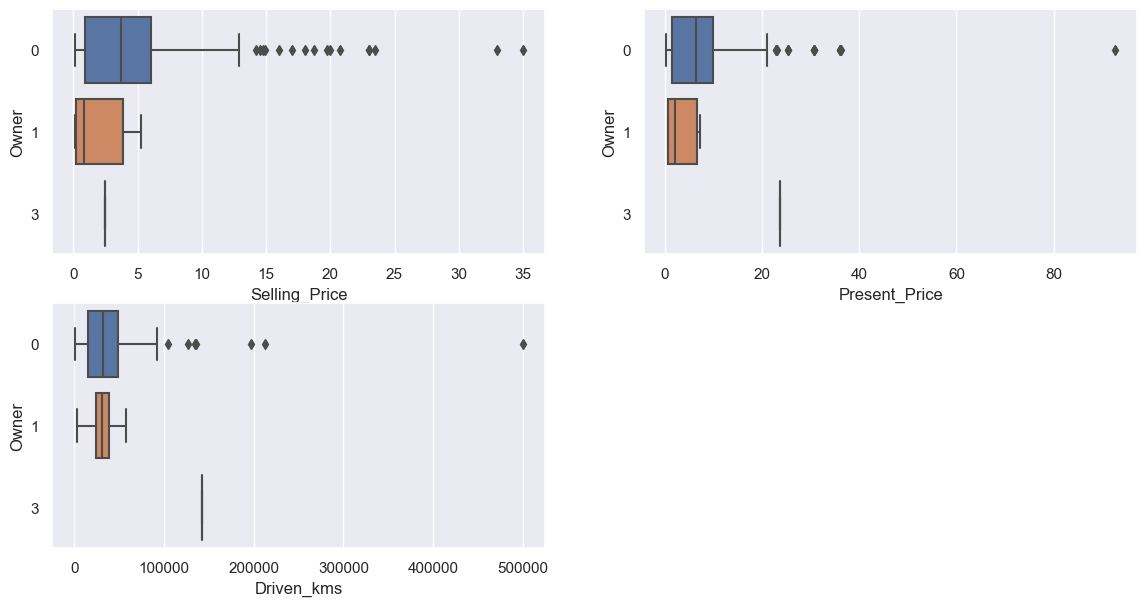

In [29]:
plt.figure(figsize=(14,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, y='Owner', x=col, orient='h')

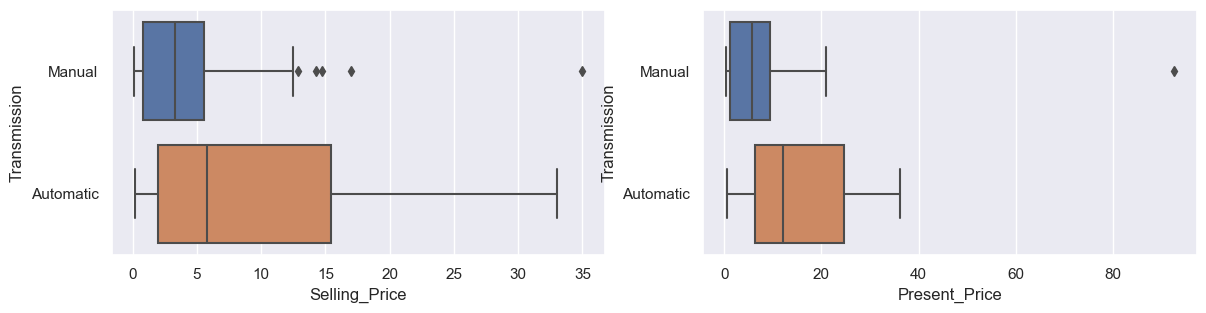

In [30]:
plt.figure(figsize=(14,7))
for i,col in enumerate(['Selling_Price','Present_Price']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, y='Transmission', x=col, orient='h')

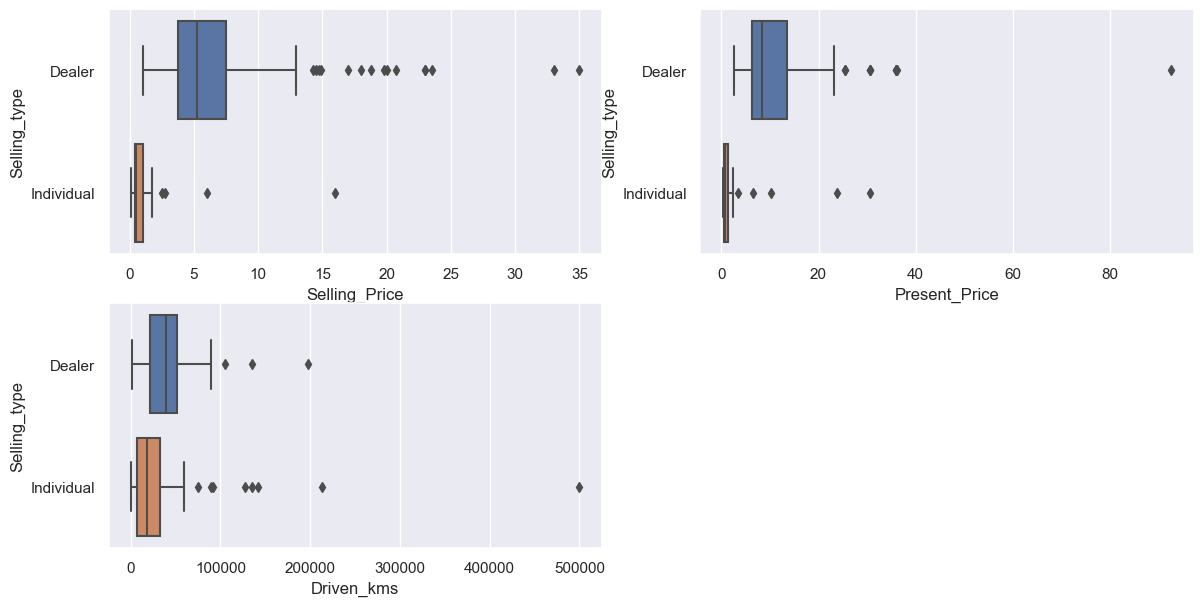

In [31]:
plt.figure(figsize=(14,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, y='Selling_type', x=col, orient='h')

In [32]:
categorical_features=["Fuel_Type","Selling_type","Transmission"]

In [33]:
dummy=pd.get_dummies(df[categorical_features],drop_first=True)

In [34]:
df=pd.concat([df,dummy],axis=1)

In [35]:
df=df.drop(categorical_features,axis=1)

In [36]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,90,2014,3.35,5.59,27000,0,0,1,0,1
1,93,2013,4.75,9.54,43000,0,1,0,0,1
2,68,2017,7.25,9.85,6900,0,0,1,0,1
3,96,2011,2.85,4.15,5200,0,0,1,0,1
4,92,2014,4.60,6.87,42450,0,1,0,0,1


In [37]:
df["Owner"].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

# Scaling the features

In [38]:
temp_feature=["Present_Price","Driven_kms","Year","Car_Name"]

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[temp_feature]=ss.fit_transform(df[temp_feature])

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,1.076344,0.132992,3.35,-0.228138,-0.254603,0,0,1,0,1
1,1.193614,-0.212787,4.75,0.233742,0.156181,0,1,0,0,1
2,0.216367,1.170329,7.25,0.269991,-0.770651,0,0,1,0,1
3,1.310883,-0.904345,2.85,-0.396520,-0.814297,0,0,1,0,1
4,1.154524,0.132992,4.60,-0.078466,0.142061,0,1,0,0,1


<AxesSubplot:ylabel='Density'>

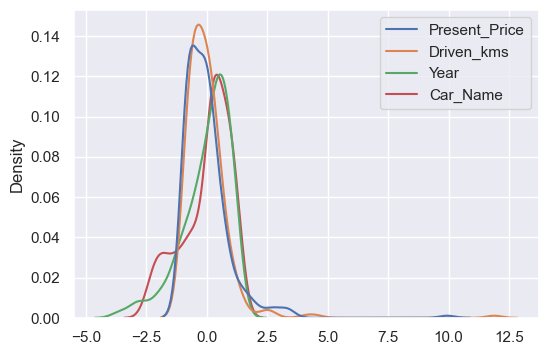

In [41]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.kdeplot(data=df[temp_feature])

The features are now scaled down to a certain range


In [42]:
#remove outliers of the data
def remove_outliers(col):
    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

df=remove_outliers('Selling_Price')
df=remove_outliers('Present_Price')
df=remove_outliers('Driven_kms')

Removed the outliers in the dataset

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
X = df.drop(['Selling_Price'],axis=1)
Y = df['Selling_Price']

In [45]:
X.shape

(275, 9)

In [46]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'decisionTree_regression': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'n_estimators':[20,50,100]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return scores

In [47]:
scores=find_best_model_using_gridsearchcv(X,Y)

In [48]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,linear_regression,0.859094,{}
1,decisionTree_regression,0.917320,"{'criterion': 'poisson', 'splitter': 'best'}"
2,random_forest,0.943729,"{'criterion': 'squared_error', 'n_estimators':..."


In [49]:
scores[2]

{'model': 'random_forest',
 'best_score': 0.943729176777248,
 'best_params': {'criterion': 'squared_error', 'n_estimators': 50}}

Random Forest with {'criterion': 'squared_error', 'n_estimators': 50} features giving best result and the score achived is approx. 94%

In [50]:
#splitting the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [51]:
model=RandomForestRegressor(criterion="squared_error", n_estimators=50)
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [52]:
model.score(X_test,Y_test)

0.945558330127922

The score on test data is also 94%

In [53]:
Y_predicted=model.predict(X_test)

Text(0, 0.5, 'Predicted Test Values')

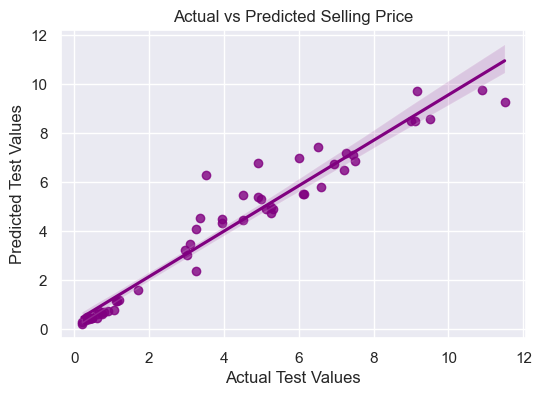

In [54]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.regplot(x=Y_test,y=Y_predicted,color='purple')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')